# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:brown">  Esercizio 11</span>



In questa esercitazione faremo una regressione, su dei dati inquinati da del rumore, tramite tecniche di machine learning  con una rete neurale(NN).
La capacità di fare un fit dipende dalla struttura della rete neurale.


### Il problema della predizione
Consideriamo dei dati $(x,y)$ che hanno origine da un processo stocastico. I dati sono campionati dall'equazione

$$
    y_i= f(x_i) + \eta_i,
$$

dove $f(x_i)$ è una funzione fissata, ma sconosciuta, e $\eta_i$ è un rumore Gaussiano e scorrelato con

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$



Utilizziamo una rete neurale che dipenda da dei parametri (pesi e bias), le funzioni che la rete è in grado di rappresentare costituiscono la classe modello che useremo per fare predizioni.

Per trovare i parametri corretti per fare un fit della funzione attorno alla quale si distribuiscono i nostri dati, addestreremo la rete sul **training data set** e poi verificheremo con un altro insieme di dati, il **validation data set**, la sua bontà. È importante sottolineare che il validation data set deve essere un data set nuovo, perchè la rete neurale deve essere in grado di fare delle predizioni su dei nuovi dati mai visti.


Per misurare la capacità di predirre del nostro algoritmo, confrontiamo ciò che il nostro algoritmo predice,$\{y_j^\mathrm{pred}\}$, con i valori veri $\{y_j\}$. Sommando gli errori quadratici medi su tutto il validation data set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

abbiamo una stima della bontà della nostra rete.

### Esercizio 11.1

### Linear fit


$$
f(x)=2x+1
$$

In [4]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

questi sono i parametri che la rete neurale dovrà cercare.

In [5]:
import numpy as np

# generate training inputs
np.random.seed(0)
Ntrain=1000
Nvalid=100
x_train = np.random.uniform(-1, 1, Ntrain)  #creo 500 numeri fra -1 e 1
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

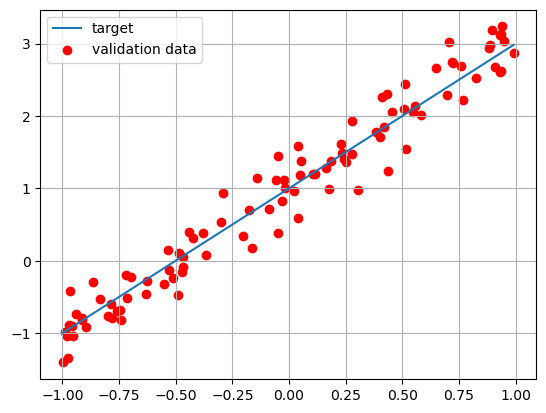

In [89]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
!pip install tensorflow

In [90]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [91]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/40


32/32 [==============================] - 1s 12ms/step - loss: 4.2885 - mse: 4.2885 - val_loss: 3.7262 - val_mse: 3.7262
Epoch 2/40
32/32 [==============================] - 0s 5ms/step - loss: 2.6287 - mse: 2.6287 - val_loss: 2.3906 - val_mse: 2.3906
Epoch 3/40
32/32 [==============================] - 0s 6ms/step - loss: 1.6804 - mse: 1.6804 - val_loss: 1.5739 - val_mse: 1.5739
Epoch 4/40
32/32 [==============================] - 0s 5ms/step - loss: 1.1024 - mse: 1.1024 - val_loss: 1.0539 - val_mse: 1.0539
Epoch 5/40
32/32 [==============================] - 0s 4ms/step - loss: 0.7381 - mse: 0.7381 - val_loss: 0.7186 - val_mse: 0.7186
Epoch 6/40
32/32 [==============================] - 0s 5ms/step - loss: 0.5061 - mse: 0.5061 - val_loss: 0.4983 - val_mse: 0.4983
Epoch 7/40
32/32 [==============================] - 0s 5ms/step - loss: 0.3556 - mse: 0.3556 - val_loss: 0.3575 - val_mse: 0.3575
Epoch 8/40
32/32 [==============================] - 0s 5ms/step - loss: 0.2611 - mse: 0.2611 - val_l

In [92]:
# return weights and biases
model.get_weights()

[array([[2.0012155]], dtype=float32), array([1.0027145], dtype=float32)]

Osserviamo che effettivamente i parametri assegnati corrispondono a quelli della funzione: il peso corrisponde al coefficiente angolare mentre il bias corrisponde all'intercetta

In [93]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

1/4 [======>.......................] - ETA: 0s - loss: 0.0528 - mse: 0.0528

4/4 [==============================] - 0s 6ms/step - loss: 0.0740 - mse: 0.0740

Test loss: 0.07395461201667786
Test accuracy: 0.07395461201667786


In [94]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 7.6840e-06 - mse: 7.6840e-06

Test loss: 7.683951480430551e-06
Test accuracy: 7.683951480430551e-06


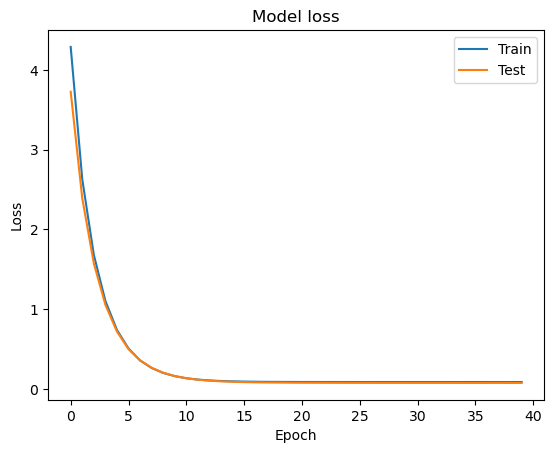

In [95]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step


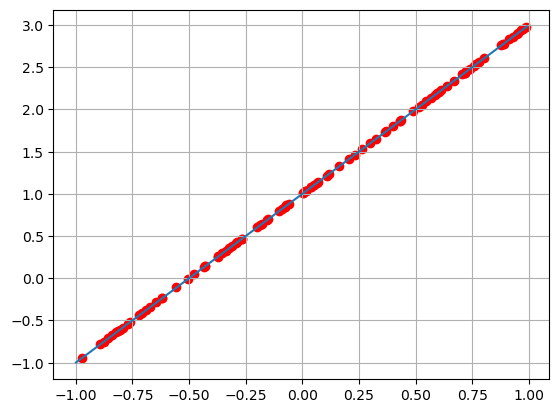

In [96]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Il numero di epoche è stato fissato a $N_{epoche}= 40$, in modo da arrivare a minimizzare la funzione di costo, un numero superiore di epoche non porta a un significativo miglioramento dato che la funzione di costo raggiunge un plateau.

 Per quanto riguarda la $\sigma$ è possibile portarla , fino al valore di 1 e ottenere ancora una previsione qualitativamente corretta. 
 
Aumentare il numero di punti su cui la rete esegue il training porta a un miglioramento della precisione se per esempio portiano $N_{train}$ da 500 a 1000, aumentando però fino a 2000 peggiora sia il confronto con la curva esatta sia con il validation data set. 


### Esercizio 11.2

Parametrizziamo ora il seguente polinomio di terzo grado

$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.


In [10]:
# target parameters of f(x) = a*x^3 + b*x^2+ c*x+ d
a = 3 
b = -2
c = -3
d = 4

In [14]:
# generate training inputs
np.random.seed(0)
Ntrain=5000
Nvalid=100
x_train = np.random.uniform(-1, 1, Ntrain)  #creo 500 numeri fra -1 e 1
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()
y_target = a*x_valid**3+ b*x_valid**2+ c*x_valid + d # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal( a*x_train**3+ b*x_train**2+ c*x_train + d , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal( a*x_valid**3+ b*x_valid**2+ c*x_valid + d , sigma)

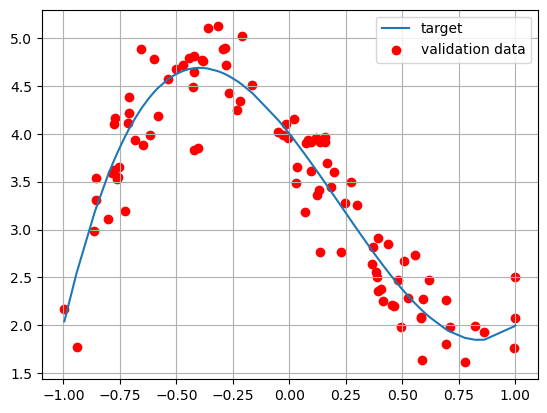

In [151]:
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 1s 5ms/step - loss: 3.4137 - mse: 3.4137 - val_loss: 0.8165 - val_mse: 0.8165
Epoch 2/50
157/157 [==============================] - 1s 3ms/step - loss: 0.7804 - mse: 0.7804 - val_loss: 0.5800 - val_mse: 0.5800
Epoch 3/50
157/157 [==============================] - 1s 3ms/step - loss: 0.6766 - mse: 0.6766 - val_loss: 0.5582 - val_mse: 0.5582
Epoch 4/50
157/157 [==============================] - 1s 5ms/step - loss: 0.6645 - mse: 0.6645 - val_loss: 0.5529 - val_mse: 0.5529
Epoch 5/50
157/157 [===

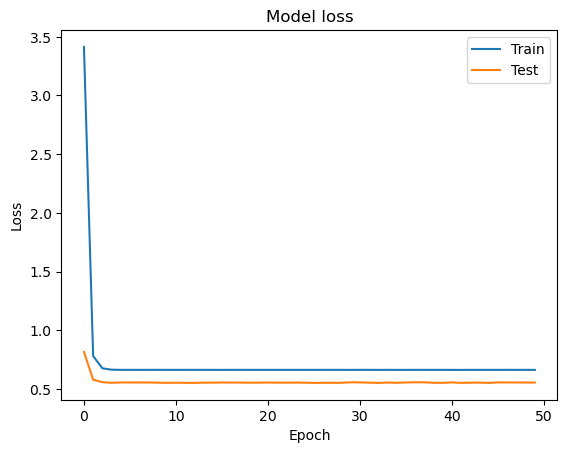

4/4 [==============================] - 0s 3ms/step


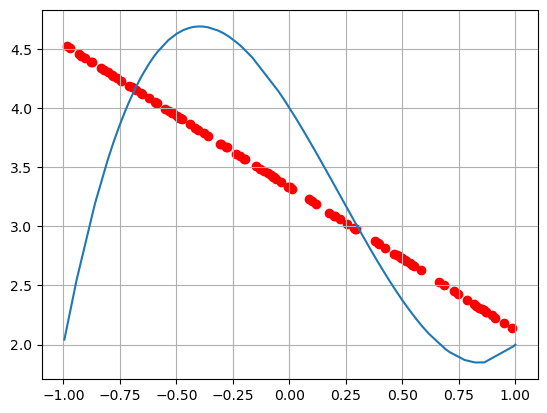

In [110]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Utilizzando un solo layer con un solo neurone la rete è in grado di eseguire solamente un fit lineare

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 1)                 2         
                                                                 
 dense_71 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
157/157 [==============================] - 2s 6ms/step - loss: 3.0818 - mse: 3.0818 - val_loss: 1.0659 - val_mse: 1.0659
Epoch 2/50
157/157 [==============================] - 1s 3ms/step - loss: 1.1707 - mse: 1.1707 - val_loss: 0.9255 - val_mse: 0.9255
Epoch 3/50
157/157 [==============================] - 1s 3ms/step - loss: 1.0558 - mse: 1.0558 - val_loss: 0.8055 - val_mse: 0.8055
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 0.8600 - mse: 0.8600 - val_loss: 0.5895 - val_mse: 0.5895
Epoch 5/50
157/157 [==============================] - 1s 3ms/step - loss: 0.6258 - mse: 0.6258 - val_loss: 0.4456 - val_mse: 0.4456
Epoch 6/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4902 - mse: 0.4902 - val_loss: 0.3795 - val_mse: 0.3795
Epoch 7/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4281 - mse: 0.4281 - val_loss: 0.3495 - val_mse: 0.3495
Epoch 8/50
157/157 [==============================] - 0s 3ms/step - loss: 0.

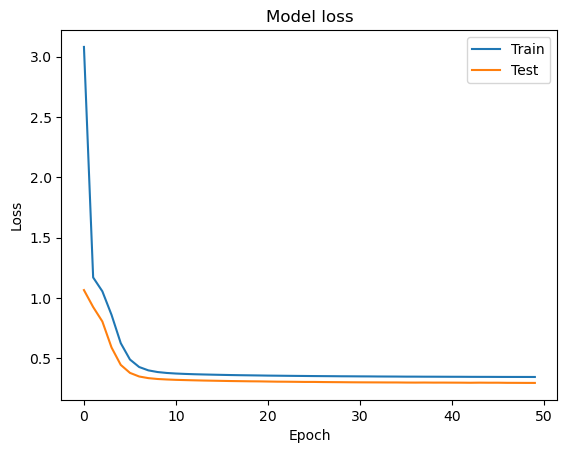

4/4 [==============================] - 0s 3ms/step


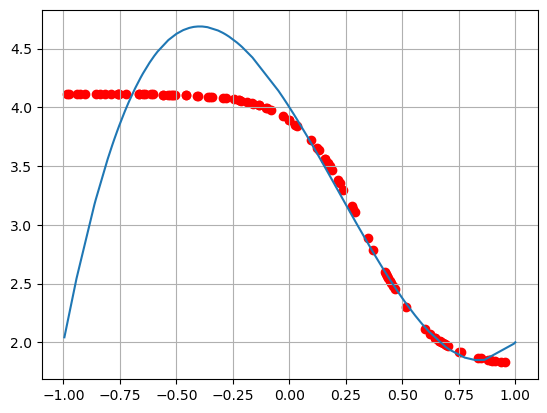

In [112]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
#model.add(Dense(4, activation= 'tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh', input_shape=(1,)))

model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Utilizzando due layers (uno di input e uno di output) ciascuno con un neurone la rete non è ancora sufficientemente complessa per eseguire il fit della funzione

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 2)                 4         
                                                                 
 dense_76 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
157/157 [==============================] - 2s 7ms/step - loss: 1.2761 - mse: 1.2761 - val_loss: 0.3992 - val_mse: 0.3992
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4292 - mse: 0.4292 - val_loss: 0.3698 - val_mse: 0.3698
Epoch 3/50
157/157 [==============================] - 1s 4ms/step - loss: 0.3995 - mse: 0.3995 - val_loss: 0.3504 - val_mse: 0.3504
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 0.3651 - mse: 0.3651 - val_loss: 0.3210 - val_mse: 0.3210
Epoch 5/50
157/157 [==============================] - 0s 3ms/step - loss: 0.3267 - mse: 0.3267 - val_loss: 0.2915 - val_mse: 0.2915
Epoch 6/50
157/157 [==============================] - 0s 3ms/step - loss: 0.2888 - mse: 0.2888 - val_loss: 0.2637 - val_mse: 0.2637
Epoch 7/50
157/157 [==============================] - 1s 3ms/step - loss: 0.2537 - mse: 0.2537 - val_loss: 0.2364 - val_mse: 0.2364
Epoch 8/50
157/157 [==============================] - 1s 4ms/step - loss: 0.

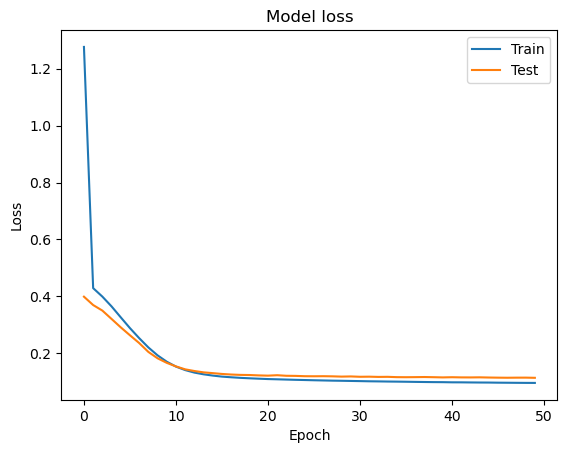

4/4 [==============================] - 0s 4ms/step


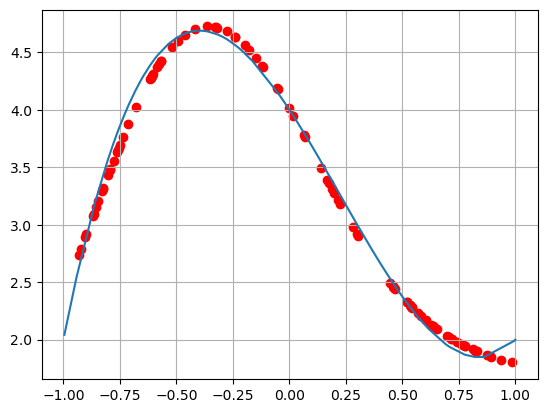

In [114]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
#model.add(Dense(4, activation= 'tanh', input_shape=(1,)))
model.add(Dense(2, activation='tanh', input_shape=(1,)))

# Output layer con un singolo neurone (per l'output dell'equazione di terzo grado)
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Utilizzando un layer di input con due neuroni e un secondo layer di output con un neurone il fit è qualitativamente soddisfacente 

Model: "sequential_27"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 4)                 8         
                                                                 
 dense_91 (Dense)            (None, 2)                 10        
                                                                 
 dense_92 (Dense)            (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 2s 5ms/step - loss: 1.1232 - mse: 1.1232 - val_loss: 0.3897 - val_mse: 0.3897
Epoch 2/50
157/157 [==============================] - 1s 3ms/step - loss: 0.4271 - mse: 0.4271 - val_loss: 0.3787 - val_mse: 0.3787
Epoch 3/50
157/157 [======================

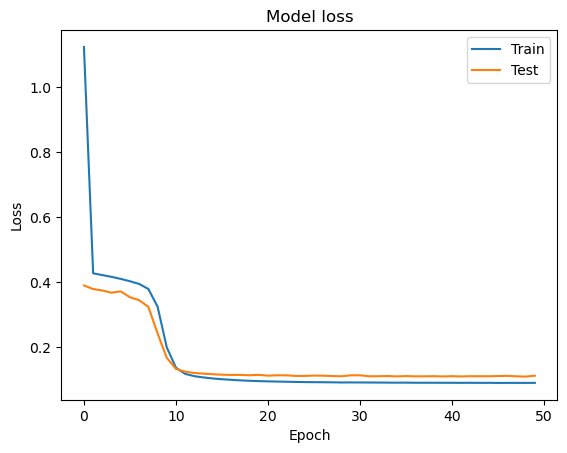

4/4 [==============================] - 0s 5ms/step


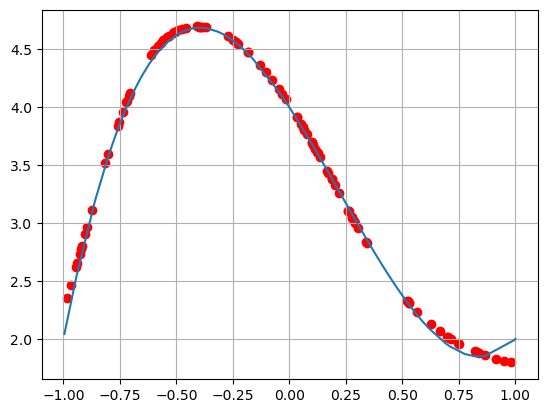

In [119]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()

model.add(Dense(4, input_shape=(1,)))

# Aggiunta del secondo layer con meno neuroni per una rappresentazione più compatta
model.add(Dense(2, activation='tanh'))


# Output layer con un singolo neurone (per l'output dell'equazione di terzo grado)
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Aggiungendo un ulteriore layer iniziale con 4 neuroni abbiamo migliorato la precisione del nostro fit 

Model: "sequential_31"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 4)                 8         
                                                                 
 dense_97 (Dense)            (None, 2)                 10        
                                                                 
 dense_98 (Dense)            (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 2s 5ms/step - loss: 2.3016 - mse: 2.3016 - val_loss: 1.0284 - val_mse: 1.0284
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 1.2245 - mse: 1.2245 - val_loss: 0.9945 - val_mse: 0.9945
Epoch 3/50
157/157 [======================

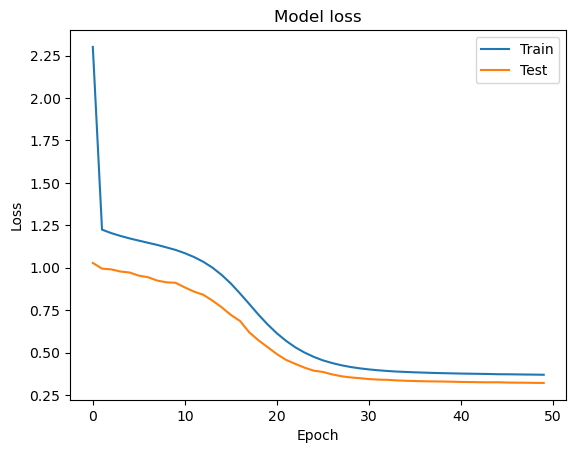

4/4 [==============================] - 0s 4ms/step


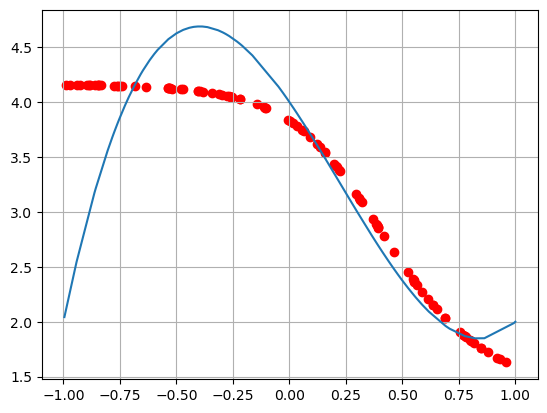

In [123]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
#model.add(Dense(4, activation= 'tanh', input_shape=(1,)))
model.add(Dense(4, activation='sigmoid', input_shape=(1,)))

# Aggiunta del secondo layer con meno neuroni per una rappresentazione più compatta
model.add(Dense(2, activation='sigmoid'))

# Aggiunta del terzo layer con ancora meno neuroni


# Output layer con un singolo neurone (per l'output dell'equazione di terzo grado)
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 4)                 8         
                                                                 
 dense_100 (Dense)           (None, 2)                 10        
                                                                 
 dense_101 (Dense)           (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 2s 5ms/step - loss: 1.2379 - mse: 1.2379 - val_loss: 0.5281 - val_mse: 0.5281
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 0.5947 - mse: 0.5947 - val_loss: 0.4655 - val_mse: 0.4655
Epoch 3/50
157/157 

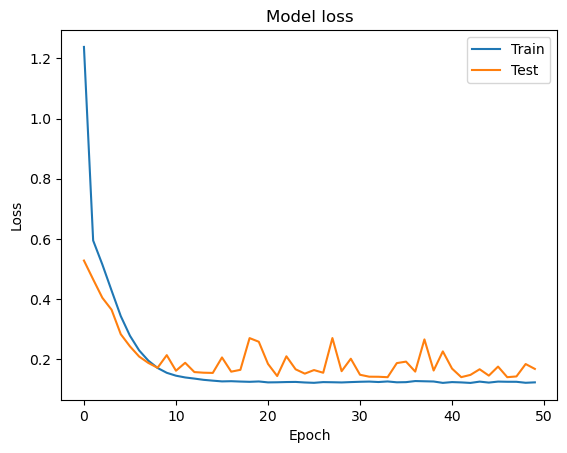

4/4 [==============================] - 0s 3ms/step


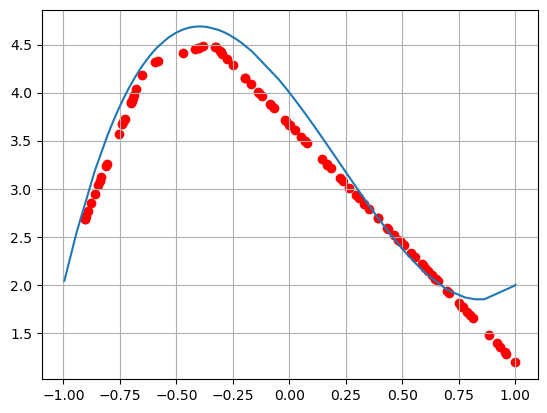

In [124]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
#model.add(Dense(4, activation= 'tanh', input_shape=(1,)))
model.add(Dense(4, activation='relu', input_shape=(1,)))

# Aggiunta del secondo layer con meno neuroni per una rappresentazione più compatta
model.add(Dense(2, activation='relu'))

# Aggiunta del terzo layer con ancora meno neuroni


# Output layer con un singolo neurone (per l'output dell'equazione di terzo grado)
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Dai due esempi precendenti si può osservare come usare delle funzioni di attivazione diverse da 'tanh' conduca a dei risultati non soddisfacenti

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 8         
                                                                 
 dense_19 (Dense)            (None, 2)                 10        
                                                                 
 dense_20 (Dense)            (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
157/157 [==============================] - 2s 5ms/step - loss: 10.2379 - mse: 10.2379 - val_loss: 7.5368 - val_mse: 7.5368
Epoch 2/50
157/157 [==============================] - 0s 3ms/step - loss: 4.8134 - mse: 4.8134 - val_loss: 2.8554 - val_mse: 2.8554
Epoch 3/50
157/157 [==============================] - 0s 3ms/step - loss: 1.7544 - mse: 1.7544 - val_loss: 1.0257 - val_mse: 1.0257
Epoch 4/50
157/157 [==============================] - 0s 3ms/step - loss: 0.7870 - mse: 0.7870 - val_loss: 0.5147 - val_mse: 0.5147
Epoch 5/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4625 - mse: 0.4625 - val_loss: 0.3902 - val_mse: 0.3902
Epoch 6/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4184 - mse: 0.4184 - val_loss: 0.3706 - val_mse: 0.3706
Epoch 7/50
157/157 [==============================] - 1s 3ms/step - loss: 0.4085 - mse: 0.4085 - val_loss: 0.3632 - val_mse: 0.3632
Epoch 8/50
157/157 [==============================] - 1s 3ms/step - loss: 

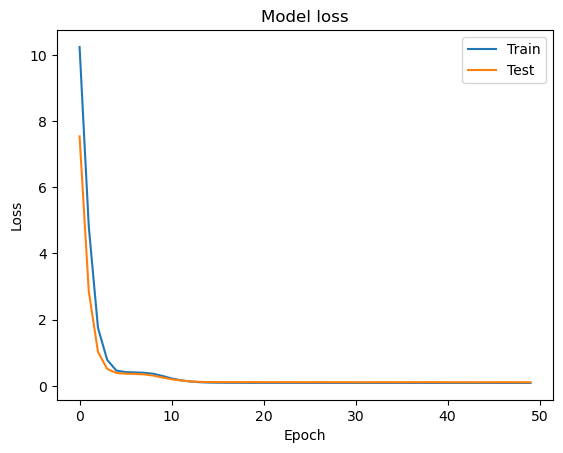

4/4 [==============================] - 0s 4ms/step


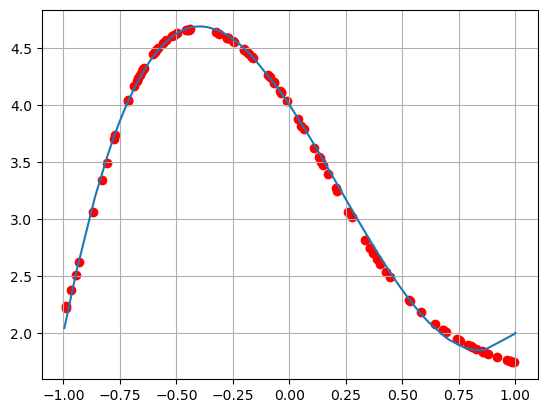

In [15]:


model = tf.keras.Sequential()
#model.add(Dense(4, activation= 'tanh', input_shape=(1,)))
model.add(Dense(4, activation='tanh', input_shape=(1,)))

# Aggiunta del secondo layer con meno neuroni per una rappresentazione più compatta
model.add(Dense(2, activation='tanh'))

# Aggiunta del terzo layer con ancora meno neuroni


# Output layer con un singolo neurone (per l'output dell'equazione di terzo grado)
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 8         
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
157/157 [==============================] - 2s 4ms/step - loss: 7.7902 - mse: 7.7902 - val_loss: 4.3666 - val_mse: 4.3666
Epoch 2/50
157/157 [==============================] - 0s 3ms/step - loss: 2.4594 - mse: 2.4594 - val_loss: 1.3332 - val_mse: 1.3332
Epoch 3/50
157/157 [==============================] - 0s 3ms/step - loss: 0.9184 - mse: 0.9184 - val_loss: 0.6363 - val_mse: 0.6363
Epoch 4/50
157/157 [==============================] - 0s 3ms/step - loss: 0.5632 - mse: 0.5632 - val_loss: 0.4561 - val_mse: 0.4561
Epoch 5/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4641 - mse: 0.4641 - val_loss: 0.4038 - val_mse: 0.4038
Epoch 6/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.3876 - val_mse: 0.3876
Epoch 7/50
157/157 [==============================] - 1s 3ms/step - loss: 0.4239 - mse: 0.4239 - val_loss: 0.3804 - val_mse: 0.3804
Epoch 8/50
157/157 [==============================] - 0s 3ms/step - loss: 0.

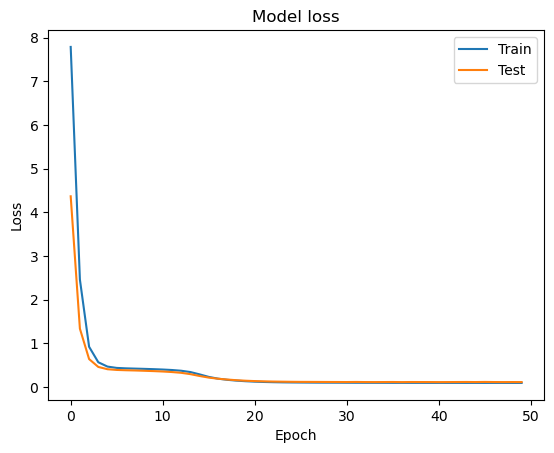

4/4 [==============================] - 0s 3ms/step


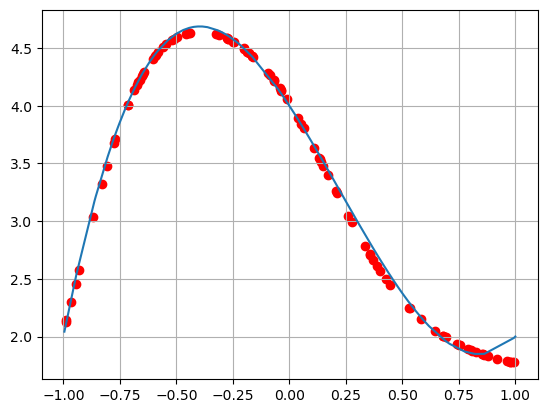

In [12]:

model = tf.keras.Sequential()
#model.add(Dense(4, activation= 'tanh', input_shape=(1,)))
model.add(Dense(4, activation='tanh', input_shape=(1,)))

# Aggiunta del secondo layer con meno neuroni per una rappresentazione più compatta
model.add(Dense(2, activation='tanh'))

# Aggiunta del terzo layer con ancora meno neuroni


# Output layer con un singolo neurone (per l'output dell'equazione di terzo grado)
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='Adam', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Dai grafici riportati sopra scopriamo che l'ottimizzatore **Stochastic Gradient Descendent** è preferibile a **Adam** o il **RMSprop** sebbene anche questi ultimi conducano a risultati soddisfacenti

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 4)                 8         
                                                                 
 dense_121 (Dense)           (None, 2)                 10        
                                                                 
 dense_122 (Dense)           (None, 1)                 3         
                                                                 


Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 2s 5ms/step - loss: 2.1249 - mae: 2.1249 - val_loss: 1.0900 - val_mae: 1.0900
Epoch 2/50
157/157 [==============================] - 1s 3ms/step - loss: 0.7989 - mae: 0.7989 - val_loss: 0.5362 - val_mae: 0.5362
Epoch 3/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4953 - mae: 0.4953 - val_loss: 0.4599 - val_mae: 0.4599
Epoch 4/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4649 - mae: 0.4649 - val_loss: 0.4522 - val_mae: 0.4522
Epoch 5/50
157/157 [==============================] - 1s 3ms/step - loss: 0.4561 - mae: 0.4561 - val_loss: 0.4478 - val_mae: 0.4478
Epoch 6/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4500 - mae: 0.4500 - val_loss: 0.4435 - val_mae: 0.4435
Epoch 7/50
157/157 [======================

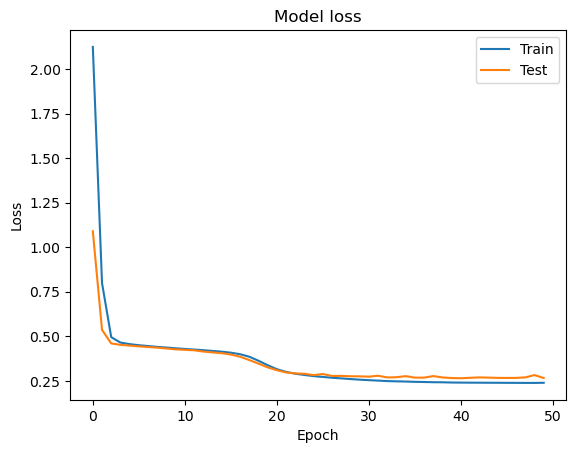

4/4 [==============================] - 0s 3ms/step


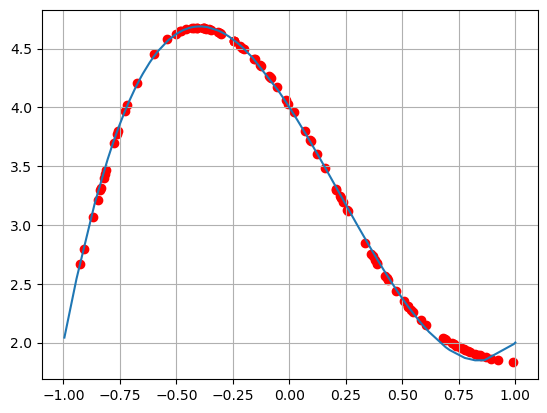

In [131]:

model = tf.keras.Sequential()
#model.add(Dense(4, activation= 'tanh', input_shape=(1,)))
model.add(Dense(4, activation='tanh', input_shape=(1,)))

# Aggiunta del secondo layer con meno neuroni per una rappresentazione più compatta
model.add(Dense(2, activation='tanh'))

# Aggiunta del terzo layer con ancora meno neuroni


# Output layer con un singolo neurone (per l'output dell'equazione di terzo grado)
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='sgd', loss='mae', metrics=['mae'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Osserviamo che l'utilizzo di MAE (Mean Absolut Error) come funzione di costo è appropriato

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 4)                 8         
                                                                 
 dense_127 (Dense)           (None, 2)                 10        
                                                                 
 dense_128 (Dense)           (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 2s 6ms/step - loss: 1.7621 - mse: 6.3864 - val_loss: 0.7521 - val_mse: 1.9248
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4344 - mse: 0.9786 - val_loss: 0.2554 - val_mse: 0.5358
Epoch 3/50
157/157 

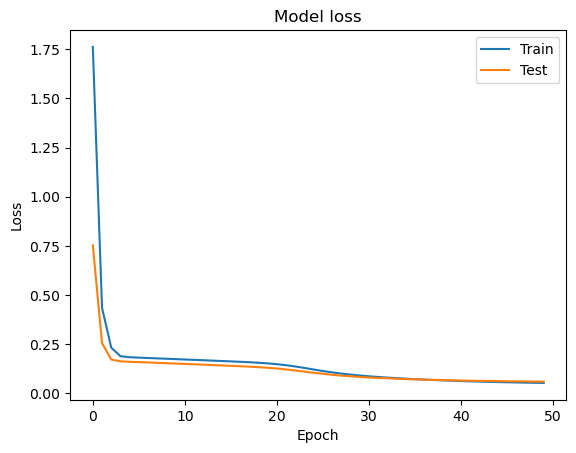

4/4 [==============================] - 0s 3ms/step


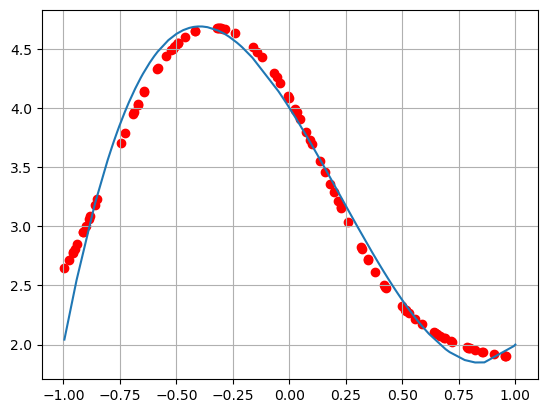

In [133]:

model = tf.keras.Sequential()
#model.add(Dense(4, activation= 'tanh', input_shape=(1,)))
model.add(Dense(4, activation='tanh', input_shape=(1,)))

# Aggiunta del secondo layer con meno neuroni per una rappresentazione più compatta
model.add(Dense(2, activation='tanh'))

# Aggiunta del terzo layer con ancora meno neuroni


# Output layer con un singolo neurone (per l'output dell'equazione di terzo grado)
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='sgd', loss='huber', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Utilizzando la funzione di costo huber si ottiene un fit visibilmente peggiore, effettivamente questa funzione è adatta a situazioni in cui nel nostro campione sono presenti dei dati particolarmente anomali, caso diverso dal nostro

Riportiamo di seguito la configurazione migliore della nostra rete neurale e analizziamo più nel dettaglio i risultati

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 4)                 8         
                                                                 
 dense_181 (Dense)           (None, 2)                 10        
                                                                 
 dense_182 (Dense)           (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
157/157 [==============================] - 1s 4ms/step - loss: 1.9277 - mse: 1.9277 - val_loss: 0.9595 - val_mse: 0.9595
Epoch 2/50
157/157 [==============================] - 0s 3ms/step - loss: 0.8666 - mse: 0.8666 - val_loss: 0.4272 - val_mse: 0.4272
Epoch 3/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4173 - mse: 0.4173 - val_loss: 0.3314 - val_mse: 0.3314
Epoch 4/50
157/157 [==============================] - 0s 2ms/step - loss: 0.3521 - mse: 0.3521 - val_loss: 0.2752 - val_mse: 0.2752
Epoch 5/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2090 - mse: 0.2090 - val_loss: 0.1543 - val_mse: 0.1543
Epoch 6/50
157/157 [==============================] - 0s 2ms/step - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1258 - val_mse: 0.1258
Epoch 7/50
157/157 [==============================] - 0s 2ms/step - loss: 0.1089 - mse: 0.1089 - val_loss: 0.1191 - val_mse: 0.1191
Epoch 8/50
157/157 [==============================] - 0s 3ms/step - loss: 0.

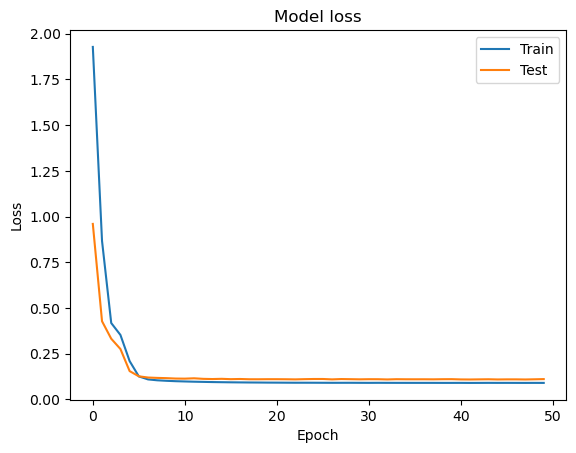

4/4 [==============================] - 0s 2ms/step


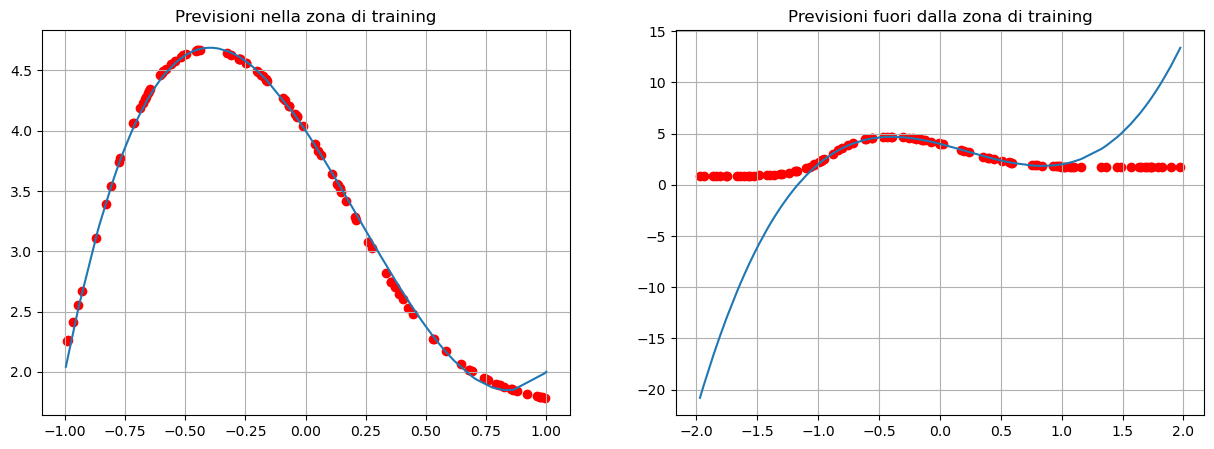

In [158]:


model = tf.keras.Sequential()
#model.add(Dense(4, activation= 'tanh', input_shape=(1,)))
model.add(Dense(4, input_shape=(1,)))

# Aggiunta del secondo layer con meno neuroni per una rappresentazione più compatta
model.add(Dense(2, activation='tanh'))

# Aggiunta del terzo layer con ancora meno neuroni


# Output layer con un singolo neurone (per l'output dell'equazione di terzo grado)
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 
# get a summary of our composed model

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


fig = plt.figure(figsize= (15,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax.scatter(x_predicted, y_predicted,color='r')
ax.plot(x_valid, y_target)
ax.set_title('Previsioni nella zona di training')

p_predicted = np.random.uniform(-2, 2, 100)
t_predicted = model.predict(p_predicted)

ax1.scatter(p_predicted, t_predicted,color='r')

p_predicted.sort()
t_target = a*p_predicted**3+ b*p_predicted**2+ c*p_predicted + d 

ax1.plot(p_predicted, t_target)

ax1.set_title('Previsioni fuori dalla zona di training')
ax.grid(True)
ax1.grid(True)

plt.grid(True)
plt.show()

Osserviamo come il modello fallisca le predizioni al di fuori della zona nella quale l'abbiamo allenato.

### Esercizio 11.3
  
Estendiamo ora il nostro modello a una funzione in due variabili $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [142]:

# generate training inputs
np.random.seed(0)
Ntrain=5000
Nvalid=500
x_train = np.random.uniform(-3./2., 3./2., Ntrain)
y_train = np.random.uniform(-3./2., 3./2., Ntrain)  #creo 1000 numeri fra -1 e 1
x_valid = np.random.uniform(-3./2., 3./2., Nvalid)
y_valid = np.random.uniform(-3./2., 3./2., Nvalid)
x_valid.sort()
y_valid.sort()
# = np.sin(x_valid*x_valid+y_valid*y_valid) # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
z_target = np.sin(x_valid*x_valid+y_valid*y_valid) 
#z_train = np.random.normal(np.sin(x_train*x_train+y_train*y_train), sigma) # actual measures from which we want to guess regression parameters
#z_valid = np.random.normal(np.sin(x_valid*x_valid+y_valid*y_valid),sigma)

z_train = np.sin(x_train*x_train+y_train*y_train)+ np.random.normal(0, sigma, size = Ntrain)
z_valid= np.sin(x_valid*x_valid+y_valid*y_valid)+ np.random.normal(0, sigma, size = Nvalid)

In [144]:
model = tf.keras.Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])    #si utilizza il stocastic gradient discendet per trovare il minimo della loss function che è il mean square error, la metrica utilizzata per misurare quanto è buona la prestazione del modello è sempre il mean squar error 

model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_159 (Dense)           (None, 128)               384       
                                                                 
 dense_160 (Dense)           (None, 64)                8256      
                                                                 
 dense_161 (Dense)           (None, 32)                2080      
                                                                 
 dense_162 (Dense)           (None, 16)                528       
                                                                 
 dense_163 (Dense)           (None, 8)                 136       
                                                                 
 dense_164 (Dense)           (None, 1)                 9         
                                                                 
Total params: 11393 (44.50 KB)
Trainable params: 1139

In [145]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data

x=np.column_stack((x_train, y_train))
y=z_train
history = model.fit (x, y,
          batch_size=50, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.column_stack((x_valid, y_valid)), z_valid))
model.get_weights()

Epoch 1/50
100/100 [==============================] - 3s 8ms/step - loss: 0.2570 - mse: 0.2570 - val_loss: 0.4096 - val_mse: 0.4096
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.1967 - mse: 0.1967 - val_loss: 0.2956 - val_mse: 0.2956
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 0.1427 - mse: 0.1427 - val_loss: 0.1606 - val_mse: 0.1606
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.1108 - mse: 0.1108 - val_loss: 0.1138 - val_mse: 0.1138
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.1057 - mse: 0.1057 - val_loss: 0.1075 - val_mse: 0.1075
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.1000 - mse: 0.1000 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1219 - val_mse: 0.1219
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 0.

[array([[-0.12712914, -0.07118882,  0.0017989 ,  0.04452842,  0.00507144,
          0.03327288, -0.0135807 , -0.05421001,  0.13899098,  0.0099643 ,
          0.08771361, -0.22225006, -0.25492105,  0.02473246, -0.04819737,
         -0.09534438, -0.0490283 ,  0.06610458, -0.03717759,  0.06020297,
          0.03995482,  0.1567149 ,  0.1637303 ,  0.02809433, -0.14446965,
          0.04099599,  0.00107116, -0.09784207,  0.07504554, -0.03811711,
          0.02499925, -0.07485867,  0.19048649,  0.08269967,  0.15870188,
          0.19892067, -0.21877302,  0.12533219,  0.24589318, -0.06229158,
          0.00180813, -0.14904547, -0.01302146,  0.18554904,  0.011079  ,
         -0.08216116,  0.01035101, -0.21596457,  0.05055987,  0.0059053 ,
          0.12920405, -0.0885854 ,  0.13132522, -0.08986397, -0.02712735,
         -0.05519816, -0.22988854,  0.14127722,  0.01291594,  0.10685548,
          0.17734729, -0.2630501 ,  0.110331  , -0.13070777,  0.10376506,
          0.13707277, -0.1083016 ,  0.

In [146]:
# evaluate model
x= np.column_stack((x_valid, y_valid))
score = model.evaluate(x, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])    #quanto il modello mi si distanzia (in termini di mean square error) dai dati di validazione
print('Test accuracy:', score[1]) #percentuali di dati che il modello azzecca giusti

# evaluate model with the exact curve
x= np.column_stack((x_valid, y_valid))
score = model.evaluate(x, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 4ms/step - loss: 0.1043 - mse: 0.1043

Test loss: 0.1043434590101242
Test accuracy: 0.1043434590101242
16/16 [==============================] - 0s 3ms/step - loss: 0.0073 - mse: 0.0073

Test loss: 0.007331385742872953
Test accuracy: 0.007331385742872953


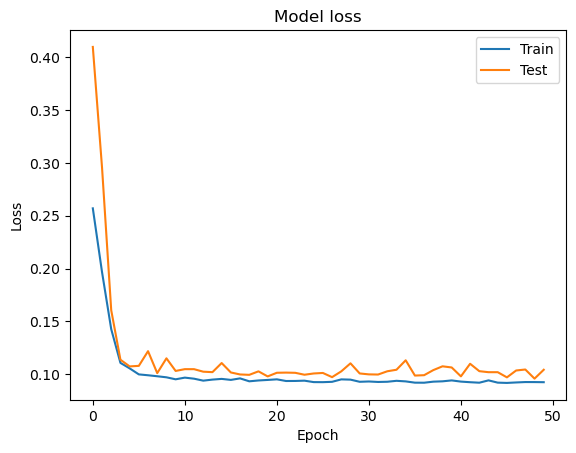

In [147]:
import matplotlib.pyplot as plt
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

32/32 [==============================] - 0s 3ms/step


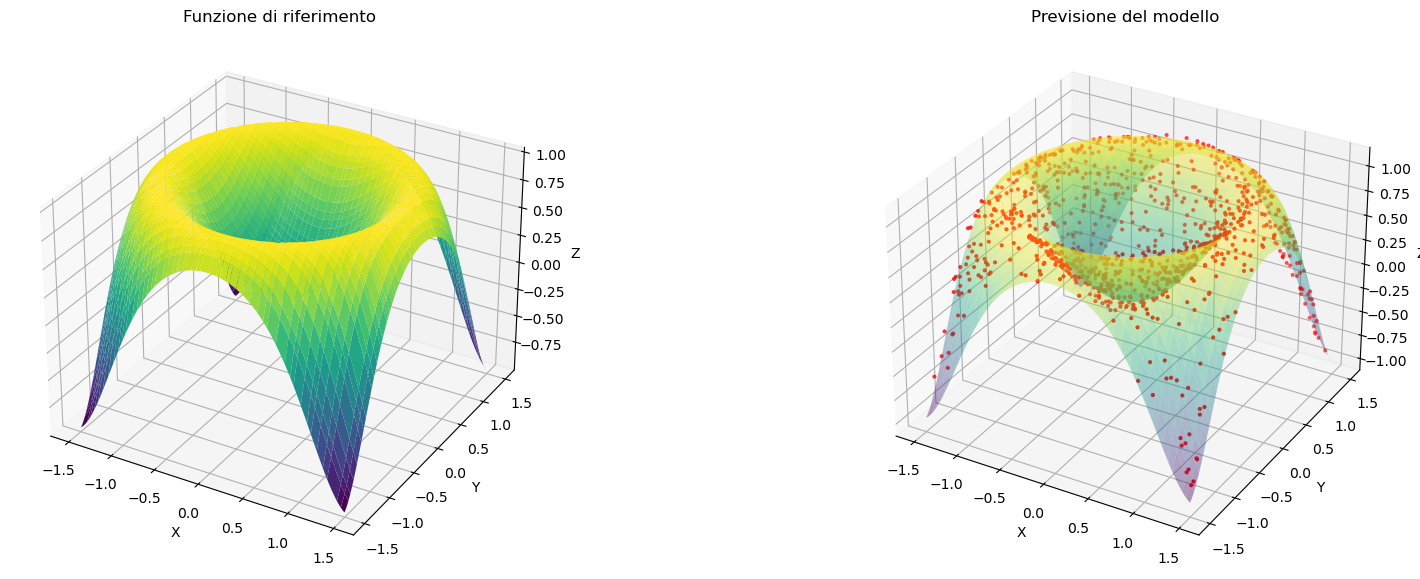

In [148]:

from mpl_toolkits.mplot3d import Axes3D

x_valid, y_valid = np.meshgrid(x_valid, y_valid)     # Crea una griglia 2D da x e y

z_target = np.sin(x_valid*x_valid+y_valid*y_valid) 
z_valid = np.random.normal(np.sin(x_valid*x_valid+y_valid*y_valid),sigma)
# Crea il grafico in 3D direttamente su plt
fig = plt.figure(figsize= (20,7))
ax = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122, projection='3d')
ax.plot_surface(x_valid, y_valid, z_target, cmap='viridis', label = 'target')
#ax.scatter(x_valid, y_valid, z_valid, c= 'r', s=2 ,label= 'validation data')



x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000) 

#x_flat = x_predicted.flatten()
#y_flat = y_predicted.flatten()



z_predicted =   model.predict(np.column_stack((x_predicted, y_predicted)))
#z_predicted = np.sin(x_predicted**2+y_predicted**2)
#x_predicted, y_predicted, z_predicted = np.meshgrid(x_predicted, y_predicted, z_predicted)

#z_predicted = z_predicted.reshape(np.column_stack((x_predicted, y_predicted)))
#z_predicted = z_predicted.reshape(x.shape)


ax1.plot_surface(x_valid, y_valid, z_target,cmap='viridis', label = 'target', alpha=0.4)

ax1.scatter(x_predicted, y_predicted, z_predicted,c='r',s=4, label='predict' )
# Imposta le etichette degli assi e il titolo
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax.set_title('Funzione di riferimento')
ax1.set_title('Previsione del modello')

plt.show()